<h1>Imports

In [1]:
from xspec import *

from datetime import datetime
import os
import numpy as np
from astropy.io import fits
import corner
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Importing necessary modules
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
data_dir = '/home/baadalvm/zaki/pipeline/notebooks/'
data_dir = '/home/baadalvm/zaki/pipeline/class_data/pradan.issdc.gov.in/ch2/protected/downloadData/POST_OD/isda_archive/ch2_bundle/cho_bundle/nop/cla_collection/cla/data/calibrated/2020/04/07'

In [3]:
fits_fnames = sorted(os.listdir(data_dir))

In [4]:
len(fits_fnames)

7172

In [5]:
fits_fnames = [ x for x in fits_fnames if x.endswith('.fits') ]

In [6]:
# 'ch2_cla_l1_20200407T014655620_20200407T014703620.fits'

In [7]:
# fits_fnames

In [8]:
# file = f'/home/baadalvm/zaki/pipeline/notebooks/ch2_cla_l1_20200407T014655620_20200407T014703620.fits'
file = 'ch2_cla_l1_20200407T014807620_20200407T014815620.fits'

In [9]:
fits_fnames.index(file)

810

In [10]:
data = fits.open(os.path.join(data_dir,file))

In [11]:
data.info()

Filename: /home/baadalvm/zaki/pipeline/class_data/pradan.issdc.gov.in/ch2/protected/downloadData/POST_OD/isda_archive/ch2_bundle/cho_bundle/nop/cla_collection/cla/data/calibrated/2020/04/07/ch2_cla_l1_20200407T014807620_20200407T014815620.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  SPECTRUM      1 BinTableHDU     73   2048R x 2C   [1I, 1E]   


In [12]:
data_2 = fits.open(os.path.join(data_dir,fits_fnames[811]))
data_3 = fits.open(os.path.join(data_dir,fits_fnames[812]))

In [27]:
d1 = fits.open(os.path.join(data_dir,fits_fnames[810]))
d2 = fits.open(os.path.join(data_dir,fits_fnames[811]))
d3 = fits.open(os.path.join(data_dir,fits_fnames[812]))
d1 = fits.open('/home/baadalvm/MIDTERM_CODE/src/ch2_cla_l1_20200407T000047620_20200407T000055620.fits')

In [28]:
data1 = d1[0].data
header1 = d1[0].header

data2 = d2[0].data
header2 = d2[0].header

# Option 1: Concatenate the data along a specific axis if it's an image or array
# For example, concatenating along rows (axis=0) or columns (axis=1) for 2D arrays.
# merged_data = np.mean((data1, data2), axis=0)  # Or axis=1 depending on your needs

# Option 2: Alternatively, you might want to combine the headers or just append the second HDU

# Create a new HDU list with merged data
# merged_hdu = fits.PrimaryHDU(merged_data, header=header1)

In [29]:
data1 = d1[1].data
header1 = d1[1].header

data2 = d3[1].data
header2 = d3[1].header

In [30]:
header1['EXPOSURE'] = 16
header1['ENDTIME'] = header2['ENDTIME']
header1['MID_UTC'] = header2['STARTIME']
header1['V2_LAT'] = header2['V2_LAT']
header1['V2_LON'] = header2['V2_LON']
header1['V3_LAT'] = header2['V3_LAT']
header1['V3_LON'] = header2['V3_LON']

for coords in ['SOLARANG','PHASEANG','EMISNANG']:
    header1[f'{coords}'] = 0.5*(header1[f'{coords}']+ header2[f'{coords}'])

In [31]:
for coords in ['V0','V1','V2','V3']:
    print(header1[f'{coords}_LAT'], header1[f'{coords}_LON'])
    print(header2[f'{coords}_LAT'], header2[f'{coords}_LON'])
    print(10*'-')

for coords in ['SOLARANG','PHASEANG','EMISNANG']:
    print(header1[f'{coords}'], header2[f'{coords}'])
    print(10*'-')

51.1369 89.1858
83.121 76.0611
----------
49.7443 89.555
81.8921 79.7659
----------
82.2144 86.0405
82.2144 86.0405
----------
83.4907 83.3272
83.4907 83.3272
----------
85.53435 88.7496
----------
85.53435 88.7496
----------
3.298893055e-08 6.0060771e-08
----------


In [32]:
d1[1].data['COUNTS'] =  (data1['COUNTS'] + data2['COUNTS'] + d2[1].data['COUNTS']) / 3.000

In [33]:
type(d1[0].data)

NoneType

In [34]:
fits.BinTableHDU

astropy.io.fits.hdu.table.BinTableHDU

In [35]:
# Create a Primary HDU for the primary data
primary_hdu = fits.PrimaryHDU(header = header1)

# Create a Secondary HDU for the secondary data (this could be a BinTableHDU, ImageHDU, etc.)
# Assuming the secondary data is a 2D array, we use a Secondary ImageHDU
secondary_hdu = fits.BinTableHDU(data = d1[1].data, header = header2)

# Combine both HDUs into a single HDUList
hdulist = fits.HDUList([primary_hdu, secondary_hdu])

# Write the combined HDUList to a new FITS file
hdulist.writeto('combined_file.fits', overwrite=True)

In [36]:
# startime = d1.header['STARTIME']
# endtime = d1.header['ENDTIME']

startime = header1['STARTIME']
endtime = header1['ENDTIME']

In [37]:
startime

'2020-04-07T00:00:47.620'

In [38]:
endtime

'2020-04-07T01:48:31.620'

In [39]:
tref = datetime(2017,1,1)

tstart = (datetime.strptime(startime, '%Y-%m-%dT%H:%M:%S.%f') - tref).total_seconds() 
tstop =(datetime.strptime(endtime, '%Y-%m-%dT%H:%M:%S.%f')-tref).total_seconds() 
 
l1dir = '/home/baadalvm/xsm2020/2020/04/07/raw'
l2dir = '/home/baadalvm/xsm2020/2020/04/07/calibrated'

base = 'ch2_xsm_20200407_v1'

l1file = l1dir+'/'+base+'_level1.fits'
hkfile = l1dir+'/'+base+'_level1.hk'
safile = l1dir+'/'+base+'_level1.sa'
gtifile = l2dir+'/'+base+'_level2.gti'

x1 = datetime.strptime(startime, '%Y-%m-%dT%H:%M:%S.%f')
x2 = datetime.strptime(endtime, '%Y-%m-%dT%H:%M:%S.%f')

specbase = f'ch2_xsm_20200407_{x1.hour}{x1.minute}{x1.second}_{x2.hour}{x2.minute}{x2.second}'

specfile = specbase+'.pha'

genspec_command="xsmgenspec l1file="+l1file+" specfile="+specfile+" spectype='time-integrated'"+ \
" tstart="+str(tstart)+" tstop="+str(tstop)+" hkfile="+hkfile+" safile="+safile+" gtifile="+gtifile

s=os.system(genspec_command)

-------------------------------------------------------------------------
  XSMDAS: Data Analysis Software for Chandrayaan-II Solar X-ray Monitor  
                     XSMDAS Version: 1.2              
                     Module : XSMGENSPEC                        
-------------------------------------------------------------------------
------------------------------------------------------------------------
MESSAGE: Ebounds CALDB file used is: /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmebounds20191214v01.fits
MESSAGE: Gain CALDB file used is: /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmgain20200330v03.fits
MESSAGE: Abscoef CALDB file used is: /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmabscoef20200410v01.fits
MESSAGE: Effareapar CALDB file used is: /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmeffareapar20210423v02.fits
MESSAGE: Syserror CALDB file used is: /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmsyserr20200410v01.fits

MESSAGE: XSMGENSPEC completed

In [40]:
specfile

'ch2_xsm_20200407_0047_14831.pha'

In [41]:
# NOTE : CHANGE PATHS OF specfile AND ARF file

In [42]:


# Load the PHA file
path = specfile
pha_data = fits.open(path) #+'/ch2_xsm_20210827_flare.pha')
spectrum = pha_data[1].data['COUNTS']

# Load the ARF file
arf_path = path.replace('.pha','.arf') 
arf_data = fits.open(arf_path) #+'/ch2_xsm_20210827_flare.arf')
effective_area = arf_data[1].data['SPECRESP']

# Load the RMF file
rmf_data = fits.open('/home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmresponse20200423v01.rmf')
energy_lo = rmf_data[2].data['ENERG_LO']
energy_hi = rmf_data[2].data['ENERG_HI']
energy_bins = (energy_hi + energy_lo) / 2
energy_errors = (energy_hi - energy_lo) / 2

# energy_bins = (energy_lo + energy_lo) / 2
# energy_errors = (energy_lo - energy_lo) / 2


# Interpolate spectrum to match energy array size
x_original = np.arange(len(spectrum))
x_new = np.linspace(0, len(spectrum)-1, len(energy_bins))
spectrum_interp = interp1d(x_original, spectrum, kind='linear')(x_new)

# Convert count rate to flux
exposure = pha_data[1].header['EXPOSURE']  # Exposure time in seconds
flux = spectrum_interp / exposure / effective_area / energy_errors
flux = np.nan_to_num(flux, nan=0.0)

# Create an output text file
with open('solar_spectrum.txt', 'w') as file:
    # file.write('# Energy(keV)  Error(keV)  Flux(photons/(s*cm^2*keV))\n')
    for en, err, fl in zip(energy_bins, energy_errors, flux):
        file.write(f"{en:.4f}  {err:.4f}  {fl:.6e}\n")

# Close all files
pha_data.close()
arf_data.close()
rmf_data.close()

/tmp/ipykernel_1917925/3956828226.py:29: RuntimeWarning: invalid value encountered in divide
  flux = spectrum_interp / exposure / effective_area / energy_errors


(0, 5)

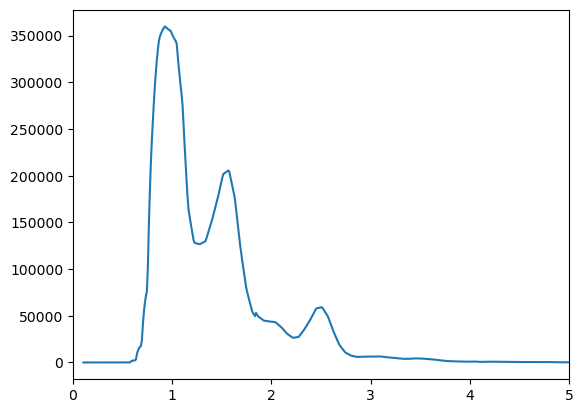

In [43]:
plt.plot(energy_bins, flux)
plt.xlim(0,5)

In [44]:
# arf 
# rmf 
# modelop is solarflux.txt
# # tbmodel 

In [45]:

spectrumfile ='combined_file.fits'# os.path.join(data_dir,fits_fnames[-1])

spec_data = Spectrum(specfile)


1 spectrum  in use
 
Spectral Data File: ch2_xsm_20200407_0047_14831.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.835e+01 +/- 3.279e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: CH-2_ORBITER Instrument: CH2_XSM  Channel Type: PI
  Exposure Time: 6464 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/baadalvm/xsmdas_software/xsmdas/caldb/CH2xsmresponse20200423v01.rmf for Source 1
 Using Auxiliary Response (ARF) File  ch2_xsm_20200407_0047_14831.arf



In [46]:
%%time
# Specifying the input files


class_l1_data = 'combined_file.fits'#/home/baadalvm/zaki/pipeline/notebooks/ch2_cla_l1_20200407T014655620_20200407T014703620.fits'


bkg_file = 'background_allevents.fits'

scatter_atable = 'tbmodel_20210827T210316000_20210827T210332000.fits'
# solar_model_file = 'modelop_20210827T210316000_20210827T210332000.txt'
solar_model_file = 'solar_spectrum.txt'

response_path = './'

static_par_file = 'static_par_localmodel.txt'
xspec_log_file = 'log_x2abund_test.txt'
xspec_xcm_file = 'xcm_x2abund_test.xcm'
plot_file = 'plots_x2abund_test.pdf'

ignore_erange = ["0.9","4.2"]
ignore_string = '0.0-' + ignore_erange[0] + ' ' + ignore_erange[1] + '-**'

# Getting the information for making the static parameter file
hdu_data = fits.open(class_l1_data)
hdu_header = hdu_data[1].header
hdu_data.close()

solar_zenith_angle = hdu_header['SOLARANG']
emiss_angle = hdu_header['EMISNANG']
sat_alt = hdu_header['SAT_ALT']
tint = hdu_header['EXPOSURE']

fid_statpar = open(static_par_file,'w')
fid_statpar.write(solar_model_file + '\n')
fid_statpar.write(str(solar_zenith_angle) + '\n')
fid_statpar.write(str(emiss_angle) + '\n')
fid_statpar.write(str(sat_alt) + '\n')
fid_statpar.write(str(tint) + '\n')
fid_statpar.close()

# ADDING MODEL
import numpy as np
from xspec import *
import xraylib
from common_modules import *
from get_xrf_lines_V1 import get_xrf_lines
from get_constants_xrf_new_V2 import get_constants_xrf
from xrf_comp_new_V2 import xrf_comp

# Getting the static parameters for the local model
static_parameter_file = 'static_par_localmodel.txt'#"static_par_localmodel.txt"
fid = open(static_parameter_file,"r")
finfo_full = fid.read()
finfo_split = finfo_full.split('\n')
solar_file = finfo_split[0]
solar_zenith_angle = float(finfo_split[1])
emiss_angle = float(finfo_split[2])
altitude = float(finfo_split[3])
exposure = float(finfo_split[4])

# Defining the model function
def xrf_localmodel(energy, parameters, flux):
    
    # Defining proper energy axis
    energy_mid = np.zeros(np.size(energy)-1)
    for i in np.arange(np.size(energy)-1):
        energy_mid[i] = 0.5*(energy[i+1] + energy[i])
        
    # Defining some input parameters required for x2abund xrf computation modules
    at_no = np.array([26,22,20,14,13,12,11,8])
    
    weight = list(parameters)
    
    i_angle = 90.0 - solar_zenith_angle
    e_angle = 90.0 - emiss_angle
    (energy_solar,tmp1_solar,counts_solar) = readcol(solar_file,format='F,F,F')
    
    # Computing the XRF line intensities
    k_lines = np.array([xraylib.KL1_LINE, xraylib.KL2_LINE, xraylib.KL3_LINE, xraylib.KM1_LINE, xraylib.KM2_LINE, xraylib.KM3_LINE, xraylib.KM4_LINE, xraylib.KM5_LINE])
    l1_lines = np.array([xraylib.L1L2_LINE, xraylib.L1L3_LINE, xraylib.L1M1_LINE, xraylib.L1M2_LINE, xraylib.L1M3_LINE, xraylib.L1M4_LINE, xraylib.L1M5_LINE, xraylib.L1N1_LINE, xraylib.L1N2_LINE, xraylib.L1N3_LINE, xraylib.L1N4_LINE, xraylib.L1N5_LINE, xraylib.L1N6_LINE, xraylib.L1N7_LINE])
    l2_lines = np.array([xraylib.L2L3_LINE, xraylib.L2M1_LINE, xraylib.L2M2_LINE, xraylib.L2M3_LINE, xraylib.L2M4_LINE, xraylib.L2M5_LINE, xraylib.L2N1_LINE, xraylib.L2N2_LINE, xraylib.L2N3_LINE, xraylib.L2N4_LINE, xraylib.L2N5_LINE, xraylib.L2N6_LINE, xraylib.L2N7_LINE])
    l3_lines = [xraylib.L3M1_LINE, xraylib.L3M2_LINE, xraylib.L3M3_LINE, xraylib.L3M4_LINE, xraylib.L3M5_LINE, xraylib.L3N1_LINE,xraylib.L3N2_LINE, xraylib.L3N3_LINE, xraylib.L3N4_LINE, xraylib.L3N5_LINE, xraylib.L3N6_LINE, xraylib.L3N7_LINE]
    xrf_lines = get_xrf_lines(at_no, xraylib.K_SHELL, k_lines, xraylib.L1_SHELL, l1_lines, xraylib.L2_SHELL, l2_lines, xraylib.L3_SHELL, l3_lines)
    const_xrf = get_constants_xrf(energy_solar, at_no, weight, xrf_lines)
    xrf_struc = xrf_comp(energy_solar,counts_solar,i_angle,e_angle,at_no,weight,xrf_lines,const_xrf)
    
    # Generating XRF spectrum
    bin_size = energy[1] - energy[0]
    ebin_left = energy_mid - 0.5*bin_size
    ebin_right = energy_mid + 0.5*bin_size
    
    no_elements = (np.shape(xrf_lines.lineenergy))[0]
    n_lines = (np.shape(xrf_lines.lineenergy))[1]
    n_ebins = np.size(energy_mid)
    
    spectrum_xrf = dblarr(n_ebins)
    for i in range(0, no_elements):
        for j in range(0, n_lines):
            line_energy = xrf_lines.lineenergy[i,j]
            bin_index = np.where((ebin_left <= line_energy) & (ebin_right >= line_energy))
            spectrum_xrf[bin_index] = spectrum_xrf[bin_index] + xrf_struc.total_xrf[i,j]
            
    # Defining the flux array required for XSPEC
    scaling_factor = (12.5*1e4*12.5*(round(exposure/8.0)+1)*1e4)/(exposure*4*np.pi*(altitude*1e4)**2)
    spectrum_xrf_scaled = scaling_factor*spectrum_xrf
    for i in range(0, n_ebins):
        flux[i] = spectrum_xrf_scaled[i]
        
# Specifying parameter information
xrf_localmodel_ParInfo = ("Wt_Fe \"\" 5 1 1 20 20 1e-2","Wt_Ti \"\" 1 1e-6 1e-6 20 20 1e-2","Wt_Ca \"\" 9 5 5 20 20 1e-2","Wt_Si \"\" 21 15 15 35 35 1e-2","Wt_Al \"\" 14 5 5 20 20 1e-2","Wt_Mg \"\" 5 1e-6 1e-6 20 20 1e-2","Wt_Na \"\" 0.5 1e-6 1e-6 5 5 1e-2","Wt_O \"\" 45 30 30 60 60 1e-2")

# # Creating the local model in PyXspec
# AllModels.addPyMod(xrf_localmodel, xrf_localmodel_ParInfo, 'add')

# PyXspec Initialisation
Xset.openLog(xspec_log_file)
# AllData.clear()
# AllModels.clear()

# Creating the local model in PyXspec
AllModels.addPyMod(xrf_localmodel, xrf_localmodel_ParInfo, 'add')

os.chdir(response_path)
# spec_data = Spectrum('ch2_cla_l1_20210827T210316000_20210827T210332000_1024.fits')
# spec_data.background = bkg_file
spec_data.ignore(ignore_string)

# Defining model and fitting
spec_data.response.gain.slope = '1.0043000'
spec_data.response.gain.offset = '0.0316000'
spec_data.response.gain.slope.frozen = True
spec_data.response.gain.offset.frozen = True

full_model = 'atable{' + scatter_atable + '} + xrf_localmodel'
mo = Model(full_model)
mo(10).values = "45.0"
mo(10).frozen = True
mo(1).frozen = True
mo(6).link = '100 - (3+4+5+7+8+9+10)'

Fit.nIterations = 5
Fit.query = "no"
Fit.perform()

# Plotting the fit outputs
pdf_plot = PdfPages(plot_file)

data_energy_tmp = np.mean(spec_data.energies, axis=1)
data_countspersec = spec_data.values
# data_background = spec_data.background.values

Logging to file: log_x2abund_test.txt
    13 channels (1-13) ignored in spectrum #     1
   400 channels (113-512) ignored in spectrum #     1


Model atable{tbmodel_20210827T210316000_20210827T210332000.fits}<1> + xrf_localmodel<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   scatter_modeladdnorm             0.0          +/-  0.0          
   2    1   scatter_modelnorm                1.00000      +/-  0.0          
   3    2   xrf_localmodelWt_Fe               5.00000      +/-  0.0          
   4    2   xrf_localmodelWt_Ti               1.00000      +/-  0.0          
   5    2   xrf_localmodelWt_Ca               9.00000      +/-  0.0          
   6    2   xrf_localmodelWt_Si               21.0000      +/-  0.0          
   7    2   xrf_localmodelWt_Al               14.0000      +/-  0.0          
   8    2   xrf_localmodelWt_Mg               5.00000      +/-  0.0          
   9    2   xrf_localmodelWt_Na               0.500000     

/home/baadalvm/MIDTERM_CODE/src/xrf_comp_new_V2.py:99: RuntimeWarning: divide by zero encountered in divide
  L = 0.5*((((np.sin(i_angle * np.pi/180))/(musample_eincident))*np.log(1+(musample_eincident)/(np.sin(i_angle * np.pi/180)*musample_echarline))) + (((np.sin(e_angle * np.pi/180))/(musample_echarline_secondary))*np.log(1+(musample_echarline_secondary)/(np.sin(e_angle * np.pi/180)*musample_echarline))))
/home/baadalvm/MIDTERM_CODE/src/xrf_comp_new_V2.py:99: RuntimeWarning: invalid value encountered in multiply
  L = 0.5*((((np.sin(i_angle * np.pi/180))/(musample_eincident))*np.log(1+(musample_eincident)/(np.sin(i_angle * np.pi/180)*musample_echarline))) + (((np.sin(e_angle * np.pi/180))/(musample_echarline_secondary))*np.log(1+(musample_echarline_secondary)/(np.sin(e_angle * np.pi/180)*musample_echarline))))



Fit statistic  : Chi-Squared                51962.38     using 99 bins.

Test statistic : Chi-Squared                51962.38     using 99 bins.
 Null hypothesis probability of 0.00e+00 with 88 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                51962.38     using 99 bins.

Test statistic : Chi-Squared                51962.38     using 99 bins.
 Null hypothesis probability of 0.00e+00 with 88 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                51962.38     using 99 bins.

Test statistic : Chi-Squared                51962.38     using 99 bins.
 Null hypothesis probability of 0.00e+00 with 89 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                51962.38     using 99 bins.

Test statistic : Chi-Squared                51962.38     using 99 bins.
 Null hypothesis probability of 0.00e+00 with 90 degrees of freedom
 Current data and model not fit y

In [ ]:
# data_background = spec_data.background.values
data_background = (0.25337078651685396, 0.2898876404494382, 0.28876404494382024, 0.28707865168539326, 0.25898876404494386, 0.28314606741573034, 0.25280898876404495, 0.25786516853932584, 0.2460674157303371, 0.2735955056179776, 0.2651685393258427, 0.2404494382022472, 0.2460674157303371, 0.25449438202247193, 0.2449438202247191, 0.2207865168539326, 0.23483146067415733, 0.23426966292134835, 0.24325842696629216, 0.2561797752808989, 0.2629213483146068, 0.2646067415730337, 0.23932584269662924, 0.22022471910112362, 0.23202247191011238, 0.22359550561797756, 0.20786516853932585, 0.200561797752809, 0.22640449438202248, 0.21235955056179778, 0.20280898876404496, 0.20674157303370788, 0.1955056179775281, 0.20393258426966293, 0.1702247191011236, 0.20955056179775283, 0.18764044943820227, 0.200561797752809, 0.17921348314606744, 0.18370786516853935, 0.17247191011235957, 0.19044943820224722, 0.18146067415730338, 0.18595505617977529, 0.17808988764044945, 0.17977528089887643, 0.1662921348314607, 0.1702247191011236, 0.1915730337078652, 0.16797752808988767, 0.16292134831460675, 0.1803370786516854, 0.1758426966292135, 0.16966292134831462, 0.1764044943820225, 0.17977528089887643, 0.1567415730337079, 0.15842696629213485, 0.15393258426966294, 0.15617977528089888, 0.16966292134831462, 0.16797752808988767, 0.16404494382022472, 0.16966292134831462, 0.1466292134831461, 0.16797752808988767, 0.16741573033707866, 0.15449438202247193, 0.1466292134831461, 0.1612359550561798, 0.1719101123595506, 0.17528089887640452, 0.15224719101123596, 0.14775280898876406, 0.15224719101123596, 0.151123595505618, 0.16235955056179777, 0.150561797752809, 0.1606741573033708, 0.15224719101123596, 0.1449438202247191, 0.150561797752809, 0.13651685393258428, 0.13932584269662923, 0.1314606741573034, 0.1359550561797753, 0.1550561797752809, 0.14887640449438203, 0.15730337078651688, 0.12191011235955057, 0.13707865168539327, 0.13764044943820225, 0.1449438202247191, 0.13202247191011238, 0.1202247191011236, 0.14325842696629215, 0.1252808988764045, 0.1297752808988764, 0.14831460674157304, 0.13707865168539327, 0.14382022471910114, 0.13876404494382025, 0.14325842696629215, 0.14438202247191012, 0.14101123595505619, 0.13764044943820225, 0.12808988764044946, 0.14382022471910114, 0.1314606741573034, 0.12640449438202248, 0.14157303370786517, 0.11797752808988765, 0.13707865168539327, 0.14325842696629215, 0.13932584269662923, 0.11910112359550563, 0.13876404494382025, 0.13876404494382025, 0.13370786516853933, 0.13707865168539327, 0.12191011235955057)
try:
    # Find the minimum size between the two arrays
    min_size = min(len(data_countspersec), len(data_background))
    
    # Slice both arrays to match the minimum size
    data_backrem = np.array(data_countspersec[:min_size]) - np.array(data_background[:min_size])
except Exception as e:
    print("An error occurred:", e)
    
folded_flux = mo.folded(1)
delchi = (data_backrem - folded_flux)/np.sqrt(folded_flux)

fig, (axis1, axis2) = plt.subplots(2, 1, gridspec_kw={'width_ratios':[1], 'height_ratios':[3,1]})
fig.suptitle('Data Model Comparison')

axis1.plot(data_energy_tmp,data_backrem)
axis1.plot(data_energy_tmp,folded_flux)
axis1.set_yscale("log")
        
axis1.set_xlabel('Energy (keV)')
axis1.set_ylabel('Counts/s')
axis1.set_xlim([float(ignore_erange[0]),float(ignore_erange[1])])
axis1.legend(['Data','Model'])
    
axis2.plot(data_energy_tmp,delchi)
axis2.set_xlabel('Energy (keV)')
axis2.set_ylabel('Delchi')
axis2.set_xlim([float(ignore_erange[0]),float(ignore_erange[1])])


pdf_plot.savefig(fig,bbox_inches='tight',dpi=300)
plt.close(fig)

pdf_plot.close()

# Closing PyXspec
if os.path.exists(xspec_xcm_file):
    os.remove(xspec_xcm_file)

Xset.save(xspec_xcm_file)
Xset.closeLog()

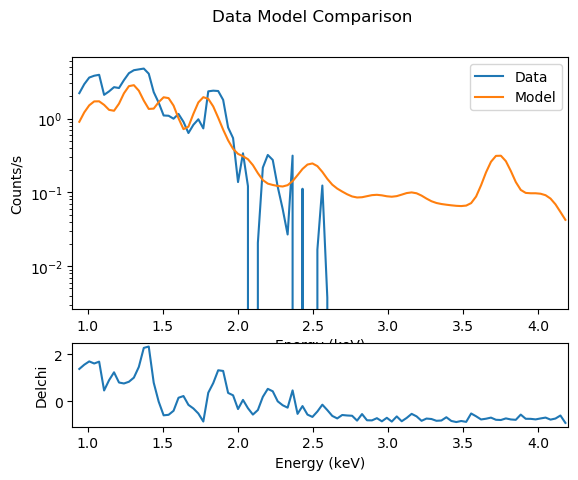

In [34]:
fig